In [2]:
import tensorflow as tf
import random
import numpy as np

SEED_VALUE = 42
tf.random.set_seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
random.seed(SEED_VALUE)

In [3]:
gpus = tf.config.list_physical_devices('GPU')
print("GPU tersedia:", gpus)
print("Nama device:", tf.test.gpu_device_name())

GPU tersedia: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Nama device: /device:GPU:0


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Data Cleaning

## Text cleansing

In [8]:
df["review"] = df["review"].str.casefold()

In [9]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [10]:
df["review"][1]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [11]:
import re #regular expressions
def clean_review(text):
    if isinstance(text, str):
        text = re.sub(r'<.*?>', ' ', text)          
        text = re.sub(r"[^a-z0-9\s'!?]", " ", text) 
        text = re.sub(r'!+', '!', text)             
        text = re.sub(r'\?+', '?', text)         
        text = re.sub(r'\s+', ' ', text).strip()   
        return text
    return ""

In [12]:
df["review"] = df["review"].apply(clean_review)

In [13]:
text = df["review"][1]

In [14]:
print(repr(text))

"a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master's of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell's murals decorating every surface are terribly well done"


In [15]:
print(text) 

a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master's of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell's murals decorating every surface are terribly well done


## Tokenization

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df["tokens"] = df["review"].apply(lambda x:word_tokenize(x))

## Stop Words Removal

In [18]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words("english"))

In [20]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [21]:
def remove_stopwords(tokens, stop_words):
    hasil = []
    for w in tokens:
        if w not in stop_words:
            hasil.append(w)
        else:
            continue
    return hasil

df["tokens"] = df["tokens"].apply(remove_stopwords, stop_words=stop_words)

In [22]:
df

,review,sentiment,tokens
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there's a family where a little boy ...,negative,"[basically, 's, family, little, boy, jake, thi..."
4,petter mattei's love in the time of money is a...,positive,"[petter, mattei, 's, love, time, money, visual..."
...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, n't, creati..."
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,i am a catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho..."
49998,i'm going to have to disagree with the previou...,negative,"['m, going, disagree, previous, comment, side,..."


## Lemmatization

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [24]:
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "V": wordnet.VERB,
        "N": wordnet.NOUN,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [27]:
def lemmatize_words(words, lemmatizer):
    hasil = []
    for w in words:
        pos = get_wordnet_pos(w) 
        lemma = lemmatizer.lemmatize(w, pos)
        hasil.append(lemma)
    return hasil

df["lemmas"] = df["tokens"].apply(lemmatize_words, lemmatizer=lemmatizer)

In [28]:
df

,review,sentiment,tokens,lemmas
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewer, mention, watch, 1, oz, episode..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonderful, little, production, film, techniqu..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,basically there's a family where a little boy ...,negative,"[basically, 's, family, little, boy, jake, thi...","[basically, 's, family, little, boy, jake, thi..."
4,petter mattei's love in the time of money is a...,positive,"[petter, mattei, 's, love, time, money, visual...","[petter, mattei, 's, love, time, money, visual..."
...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, n't, creati...","[thought, movie, right, good, job, n't, creati..."
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, act, idiotic, ..."
49997,i am a catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho...","[catholic, taught, parochial, elementary, scho..."
49998,i'm going to have to disagree with the previou...,negative,"['m, going, disagree, previous, comment, side,...","['m, go, disagree, previous, comment, side, ma..."


# Join Tokens

In [29]:
def join_tokens(tokens):
    return " ".join(tokens)

In [30]:
df["final_text"] = df["lemmas"].apply(join_tokens)

In [31]:
df

,review,sentiment,tokens,lemmas,final_text
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewer, mention, watch, 1, oz, episode...",one reviewer mention watch 1 oz episode 'll ho...
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonderful, little, production, film, techniqu...",wonderful little production film technique una...
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,"[basically, 's, family, little, boy, jake, thi...","[basically, 's, family, little, boy, jake, thi...",basically 's family little boy jake think 's z...
4,petter mattei's love in the time of money is a...,positive,"[petter, mattei, 's, love, time, money, visual...","[petter, mattei, 's, love, time, money, visual...",petter mattei 's love time money visually stun...
...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, n't, creati...","[thought, movie, right, good, job, n't, creati...",thought movie right good job n't creative orig...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, act, idiotic, ...",bad plot bad dialogue bad act idiotic direct a...
49997,i am a catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho...","[catholic, taught, parochial, elementary, scho...",catholic taught parochial elementary school nu...
49998,i'm going to have to disagree with the previou...,negative,"['m, going, disagree, previous, comment, side,...","['m, go, disagree, previous, comment, side, ma...",'m go disagree previous comment side maltin on...


# Encode Target

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["label_encoded"] = encoder.fit_transform(df["sentiment"])  # sentiment → 0/1

In [33]:
print(encoder.classes_)

['negative' 'positive']


# Data Splitting

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(
    df["final_text"], df["label_encoded"],
    test_size=0.2,             
    random_state=SEED_VALUE,
    stratify=df["label_encoded"] 
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp,
    test_size=0.5,             
    random_state=SEED_VALUE,
    stratify=y_temp
)

In [36]:
print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)

Train: (40000,)
Val: (5000,)
Test: (5000,)


# Tokenizer (Indexing)

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [38]:
tokenizer = Tokenizer(num_words=5000, oov_token="<UNK>")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq   = tokenizer.texts_to_sequences(x_val)
x_test_seq  = tokenizer.texts_to_sequences(x_test)

# Padding

In [39]:
import numpy as np
lengths = [len(seq) for seq in x_train_seq]
maxlen_90 = int(np.percentile(lengths, 90))
print("Maxlen (90th percentile train):", maxlen_90)

Maxlen (90th percentile train): 247


In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen_90, padding="post", truncating="post")
x_val_pad   = pad_sequences(x_val_seq,   maxlen=maxlen_90, padding="post", truncating="post")
x_test_pad  = pad_sequences(x_test_seq,  maxlen=maxlen_90, padding="post", truncating="post")

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [43]:
vocab_size = 5000   
embedding_dim = 16 
maxlen = maxlen_90    

# Callback

In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor="val_loss", 
    patience=2, 
    restore_best_weights=True
)

callbacks = [early_stop]

# Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SpatialDropout1D, Dropout

model = Sequential([
    Embedding(vocab_size, 16, input_length=maxlen),
    GlobalMaxPooling1D(),
    Dense(1, activation="sigmoid")
])

optimizer = Adam(learning_rate=1e-4)  
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 247, 16)           80000     
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 80,017
Trainable params: 80,017
Non-trainable params: 0
_________________________________________________________________


# Train

In [46]:
history = model.fit(
    x_train_pad, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val_pad, y_val),
    callbacks=callbacks
)

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6838 - accuracy: 0.7516 - val_loss: 0.6691 - val_accuracy: 0.7862
Epoch 2/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6478 - accuracy: 0.7918 - val_loss: 0.6248 - val_accuracy: 0.7876
Epoch 3/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5995 - accuracy: 0.7922 - val_loss: 0.5744 - val_accuracy: 0.7918
Epoch 4/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5507 - accuracy: 0.7957 - val_loss: 0.5284 - val_accuracy: 0.7938
Epoch 5/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5090 - accuracy: 0.8015 - val_loss: 0.4913 - val_accuracy: 0.7998
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4762 - accuracy: 0.8084 - val_loss: 0.4628 - val_accuracy: 0.8078
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8142 - val_loss: 0.4409 - val_ac

## Visualization

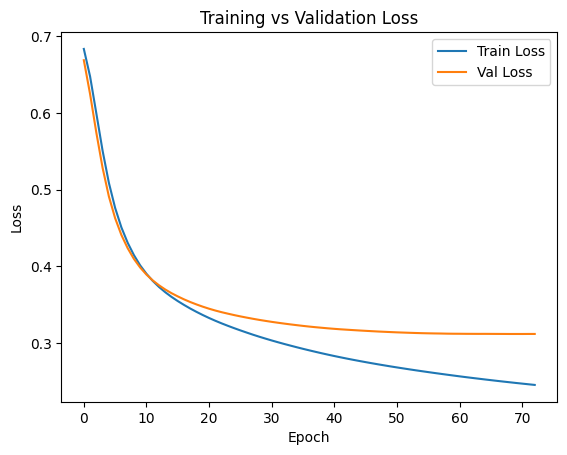

In [47]:
# Plot Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()

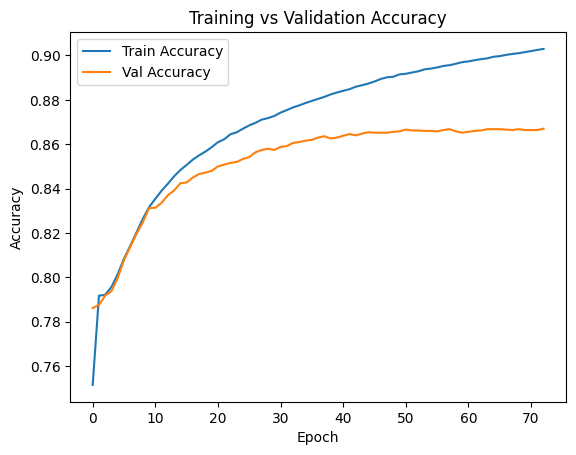

In [48]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

## Evaluation

In [49]:
from sklearn.metrics import classification_report

y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["negative","positive"]))

157/157 [==============================] - 0s 587us/step
              precision    recall  f1-score   support

    negative       0.86      0.87      0.87      2500
    positive       0.87      0.86      0.86      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



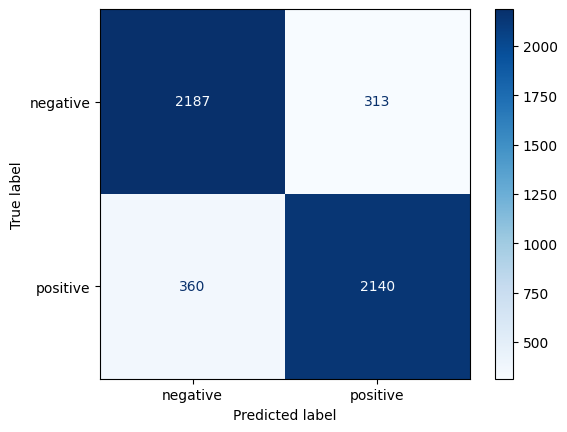

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative","positive"])
disp.plot(cmap="Blues")

# Save model

In [60]:
model.save("sentiment_model.h5")

In [61]:
from tensorflow.keras.models import load_model

model_loaded = load_model("sentiment_model.h5")

In [62]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
# Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer_loaded = pickle.load(f)

# inference

In [71]:
# Input
new_reviews = [
    """I didn’t expect much going in, but this film completely surprised me. From the very first scene, 
    the pacing felt tight and engaging, and the characters had genuine chemistry that made their relationships believable. 
    The cinematography was surprisingly beautiful, with several shots that stayed in my mind long after it ended. 
    While the story followed a somewhat familiar arc, the execution gave it a fresh energy. 
    By the time the credits rolled, I found myself smiling and thinking I’d easily watch it again, which doesn’t happen often for me.""",
    
    """This was honestly difficult to sit through. The dialogue felt forced from the start, and most of the performances came across as 
    wooden rather than convincing. The pacing dragged in the middle, making it feel much longer than it actually was, and the attempts at 
    humor often fell flat. The visuals didn’t help either — bland set design and choppy editing only highlighted how underwhelming the overall 
    production was. By the end, instead of feeling invested in the story, I was just relieved it was finally over.""",

    """
    The acting and cinematography was excellent!
    """
]

# Convert to sequence
new_seq = tokenizer_loaded.texts_to_sequences(new_reviews)

from tensorflow.keras.preprocessing.sequence import pad_sequences
new_pad = pad_sequences(new_seq, maxlen=maxlen, padding="post", truncating="post")

# Pred
y_pred_prob = model_loaded.predict(new_pad)
for review, prob in zip(new_reviews, y_pred_prob.flatten()):
    sentiment = "positive" if prob > 0.5 else "negative"
    print(f"\nReview: {review}")
    print(f"→ Probability Positive: {prob:.4f}, Probability Negative: {1-prob:.4f}")
    print(f"→ Predicted Sentiment: {sentiment}")

1/1 [==============================] - 0s 11ms/step

Review: I didn’t expect much going in, but this film completely surprised me. From the very first scene, 
    the pacing felt tight and engaging, and the characters had genuine chemistry that made their relationships believable. 
    The cinematography was surprisingly beautiful, with several shots that stayed in my mind long after it ended. 
    While the story followed a somewhat familiar arc, the execution gave it a fresh energy. 
    By the time the credits rolled, I found myself smiling and thinking I’d easily watch it again, which doesn’t happen often for me.
→ Probability Positive: 0.9132, Probability Negative: 0.0868
→ Predicted Sentiment: positive

Review: This was honestly difficult to sit through. The dialogue felt forced from the start, and most of the performances came across as 
    wooden rather than convincing. The pacing dragged in the middle, making it feel much longer than it actually was, and the attempts at 
    